# Casas para Alugar no Brazil

Este dataset possui 10962 casas para alugar com 13 classes diferentes.

Colunas:
- city: Cidade onde o imóvel está localizada / City where the property is located
- area: Area do imovel
- rooms: Numero de quartos
- bathroom: Número de banheiros
- parking spaces: Número de vagas de estacionamento
- floor: Número de andares
- animal: Aceita animais?
- furniture: Mobiliada?
- hoa: Valor do condomímio
- rent amount: Valor do aluguel
- property tax: Valor IPTU
- fire insurance: Valor do Seguro Incêndio
- total: Valor total (hoa + rent amount + fire insurance + property tax)

## Imports

In [1]:
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [2]:
data = pd.read_csv('houses_to_rent_v2.csv')
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [3]:
data.shape

(10692, 13)

## Data Pre-Processing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [5]:
data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [6]:
data.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [7]:
data = data.rename(columns={'city':'Cidade', 'area':'Area (m2)', 'rooms':'Quartos', 'bathroom':'Banheiros', 
                           'parking spaces':'Vagas', 'floor':'Andares','animal':'Animais', 'furniture':'Mobiliado', 
                           'hoa (R$)':'Condomínio (R$)', 'rent amount (R$)':'Aluguel (R$)', 'property tax (R$)': 'IPTU (R$)',
                           'fire insurance (R$)':'Seguro Incêndio (R$)', 'total (R$)':'Total (R$)'})

In [8]:
data=data.drop_duplicates()

In [9]:
data.shape

(10334, 13)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10334 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cidade                10334 non-null  object
 1   Area (m2)             10334 non-null  int64 
 2   Quartos               10334 non-null  int64 
 3   Banheiros             10334 non-null  int64 
 4   Vagas                 10334 non-null  int64 
 5   Andares               10334 non-null  object
 6   Animais               10334 non-null  object
 7   Mobiliado             10334 non-null  object
 8   Condomínio (R$)       10334 non-null  int64 
 9   Aluguel (R$)          10334 non-null  int64 
 10  IPTU (R$)             10334 non-null  int64 
 11  Seguro Incêndio (R$)  10334 non-null  int64 
 12  Total (R$)            10334 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [11]:
data['Andares'].unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

In [12]:
data.loc[data['Andares']=='301']

,Cidade,Area (m2),Quartos,Banheiros,Vagas,Andares,Animais,Mobiliado,Condomínio (R$),Aluguel (R$),IPTU (R$),Seguro Incêndio (R$),Total (R$)
2562,Belo Horizonte,80,3,2,2,301,acept,not furnished,750,2600,164,35,3549


In [13]:
data.drop(index=2562)

,Cidade,Area (m2),Quartos,Banheiros,Vagas,Andares,Animais,Mobiliado,Condomínio (R$),Aluguel (R$),IPTU (R$),Seguro Incêndio (R$),Total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [14]:
# Excluindo valor não numérico
data = data.drop(data[data['Andares'] =='-'].index)

In [15]:
data['Andares'].unique()

array(['7', '20', '6', '2', '1', '4', '3', '10', '11', '24', '9', '8',
       '17', '18', '5', '13', '15', '16', '14', '26', '12', '21', '19',
       '22', '27', '23', '35', '25', '46', '28', '29', '301', '51', '32'],
      dtype=object)

In [16]:
data.shape

(7963, 13)

## Data Exploration

In [17]:
data.describe()

,Area (m2),Quartos,Banheiros,Vagas,Condomínio (R$),Aluguel (R$),IPTU (R$),Seguro Incêndio (R$),Total (R$)
count,7963.000000,7963.000000,7963.000000,7963.000000,7.963000e+03,7963.000000,7963.000000,7963.000000,7.963000e+03
mean,126.897903,2.368203,2.086400,1.388547,1.376190e+03,3637.493533,353.787141,47.151702,5.414854e+03
std,610.886172,1.027530,1.263091,1.244623,1.302011e+04,3167.721710,3570.161057,40.535307,1.419882e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,460.000000,0.000000,3.000000,5.070000e+02
25%,55.000000,2.000000,1.000000,1.000000,4.300000e+02,1500.000000,38.000000,20.000000,2.116500e+03
50%,80.000000,2.000000,2.000000,1.000000,7.700000e+02,2500.000000,117.000000,33.000000,3.535000e+03
75%,146.000000,3.000000,3.000000,2.000000,1.573500e+03,4500.000000,340.000000,58.000000,6.539500e+03
max,46335.000000,7.000000,9.000000,8.000000,1.117000e+06,24000.000000,313700.000000,305.000000,1.120000e+06


In [18]:
# Número de casas por cidade
data['Cidade'].value_counts()

São Paulo         4157
Rio de Janeiro    1339
Porto Alegre       963
Belo Horizonte     878
Campinas           626
Name: Cidade, dtype: int64

In [19]:
# Casa com maior área
data.sort_values(by='Area (m2)', ascending=False)

,Cidade,Area (m2),Quartos,Banheiros,Vagas,Andares,Animais,Mobiliado,Condomínio (R$),Aluguel (R$),IPTU (R$),Seguro Incêndio (R$),Total (R$)
2397,Belo Horizonte,46335,4,8,5,11,acept,furnished,960,8500,646,114,10220
5915,São Paulo,24606,5,4,4,12,acept,not furnished,2254,8100,7859,103,18320
9241,Campinas,12732,3,2,0,3,acept,not furnished,700,1600,96,21,2417
8790,Belo Horizonte,2000,3,3,2,2,acept,furnished,3000,5000,200,67,8267
10184,São Paulo,1000,4,5,7,5,acept,not furnished,8362,6800,4170,87,19420
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4273,Rio de Janeiro,15,1,1,0,11,not acept,furnished,0,1670,0,22,1692
2000,Rio de Janeiro,15,1,1,0,1,not acept,not furnished,500,1100,0,15,1615
4864,São Paulo,13,1,1,0,1,acept,not furnished,0,2200,5,28,2233
1588,São Paulo,13,1,1,0,2,acept,not furnished,0,2200,42,28,2270


In [20]:
data.loc[[2397]]

,Cidade,Area (m2),Quartos,Banheiros,Vagas,Andares,Animais,Mobiliado,Condomínio (R$),Aluguel (R$),IPTU (R$),Seguro Incêndio (R$),Total (R$)
2397,Belo Horizonte,46335,4,8,5,11,acept,furnished,960,8500,646,114,10220


In [21]:
# Casa com menor área
data.sort_values(by='Area (m2)', ascending=True)

,Cidade,Area (m2),Quartos,Banheiros,Vagas,Andares,Animais,Mobiliado,Condomínio (R$),Aluguel (R$),IPTU (R$),Seguro Incêndio (R$),Total (R$)
785,São Paulo,11,1,1,0,1,not acept,furnished,300,2000,42,26,2368
1588,São Paulo,13,1,1,0,2,acept,not furnished,0,2200,42,28,2270
4864,São Paulo,13,1,1,0,1,acept,not furnished,0,2200,5,28,2233
8928,Rio de Janeiro,15,1,1,0,2,not acept,not furnished,0,1000,0,13,1013
4273,Rio de Janeiro,15,1,1,0,11,not acept,furnished,0,1670,0,22,1692
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,São Paulo,1000,4,7,4,10,acept,furnished,6000,15000,4900,191,26090
8790,Belo Horizonte,2000,3,3,2,2,acept,furnished,3000,5000,200,67,8267
9241,Campinas,12732,3,2,0,3,acept,not furnished,700,1600,96,21,2417
5915,São Paulo,24606,5,4,4,12,acept,not furnished,2254,8100,7859,103,18320


In [22]:
data.loc[[785]]

,Cidade,Area (m2),Quartos,Banheiros,Vagas,Andares,Animais,Mobiliado,Condomínio (R$),Aluguel (R$),IPTU (R$),Seguro Incêndio (R$),Total (R$)
785,São Paulo,11,1,1,0,1,not acept,furnished,300,2000,42,26,2368


In [23]:
# Casa com maior valor total
data.sort_values(by='Total (R$)', ascending=False)

,Cidade,Area (m2),Quartos,Banheiros,Vagas,Andares,Animais,Mobiliado,Condomínio (R$),Aluguel (R$),IPTU (R$),Seguro Incêndio (R$),Total (R$)
255,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000
6645,São Paulo,42,1,2,1,6,not acept,not furnished,690,2500,313700,32,316900
6230,São Paulo,340,5,4,2,7,acept,not furnished,220000,12000,1000,153,233200
2859,São Paulo,285,4,5,4,6,acept,furnished,200000,20000,1834,254,222100
2928,Rio de Janeiro,35,1,1,0,1,acept,furnished,81150,4500,9900,58,95610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847,Belo Horizonte,30,1,1,0,2,not acept,not furnished,0,550,0,8,558
4868,Belo Horizonte,30,1,1,0,2,acept,not furnished,0,525,25,7,557
4294,Belo Horizonte,20,1,1,0,1,not acept,not furnished,0,500,42,7,549
10218,Belo Horizonte,25,1,1,1,1,not acept,not furnished,0,500,38,7,545


In [24]:
data.loc[[255]]

,Cidade,Area (m2),Quartos,Banheiros,Vagas,Andares,Animais,Mobiliado,Condomínio (R$),Aluguel (R$),IPTU (R$),Seguro Incêndio (R$),Total (R$)
255,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000


In [25]:
# Casa com menor valor total
data.sort_values(by='Total (R$)', ascending=True)

,Cidade,Area (m2),Quartos,Banheiros,Vagas,Andares,Animais,Mobiliado,Condomínio (R$),Aluguel (R$),IPTU (R$),Seguro Incêndio (R$),Total (R$)
5876,Rio de Janeiro,30,1,1,1,3,acept,not furnished,0,500,0,7,507
10218,Belo Horizonte,25,1,1,1,1,not acept,not furnished,0,500,38,7,545
4294,Belo Horizonte,20,1,1,0,1,not acept,not furnished,0,500,42,7,549
4868,Belo Horizonte,30,1,1,0,2,acept,not furnished,0,525,25,7,557
1847,Belo Horizonte,30,1,1,0,2,not acept,not furnished,0,550,0,8,558
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,Rio de Janeiro,35,1,1,0,1,acept,furnished,81150,4500,9900,58,95610
2859,São Paulo,285,4,5,4,6,acept,furnished,200000,20000,1834,254,222100
6230,São Paulo,340,5,4,2,7,acept,not furnished,220000,12000,1000,153,233200
6645,São Paulo,42,1,2,1,6,not acept,not furnished,690,2500,313700,32,316900


In [26]:
data.loc[[5876]]

,Cidade,Area (m2),Quartos,Banheiros,Vagas,Andares,Animais,Mobiliado,Condomínio (R$),Aluguel (R$),IPTU (R$),Seguro Incêndio (R$),Total (R$)
5876,Rio de Janeiro,30,1,1,1,3,acept,not furnished,0,500,0,7,507


In [27]:
# Casa com maior número de quartos
data.sort_values(by='Quartos', ascending=False)

,Cidade,Area (m2),Quartos,Banheiros,Vagas,Andares,Animais,Mobiliado,Condomínio (R$),Aluguel (R$),IPTU (R$),Seguro Incêndio (R$),Total (R$)
4634,Belo Horizonte,156,7,2,1,3,acept,not furnished,350,2200,187,30,2767
1946,Rio de Janeiro,600,7,6,1,12,not acept,furnished,1300,15000,1167,194,17660
6484,Porto Alegre,180,6,2,3,1,acept,not furnished,0,4800,242,71,5113
1467,Belo Horizonte,420,6,4,0,5,acept,not furnished,927,3500,405,47,4879
3772,Rio de Janeiro,950,6,5,2,3,not acept,furnished,0,13000,1500,198,14700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,Porto Alegre,50,1,1,0,1,acept,not furnished,287,1100,46,17,1450
3625,Porto Alegre,60,1,1,1,2,not acept,not furnished,345,1290,35,19,1689
3623,São Paulo,44,1,1,0,10,acept,not furnished,370,2600,0,33,3003
3622,Porto Alegre,70,1,1,0,3,not acept,not furnished,150,850,46,13,1059


In [28]:
data.loc[[4634]]

,Cidade,Area (m2),Quartos,Banheiros,Vagas,Andares,Animais,Mobiliado,Condomínio (R$),Aluguel (R$),IPTU (R$),Seguro Incêndio (R$),Total (R$)
4634,Belo Horizonte,156,7,2,1,3,acept,not furnished,350,2200,187,30,2767


In [29]:
# Contagem de imóveis mobiliados e não mobiliados
data['Mobiliado'].value_counts()

not furnished    5783
furnished        2180
Name: Mobiliado, dtype: int64

In [30]:
# Contagem de imóveis que aceitam e que não aceitam animais
data['Animais'].value_counts()

acept        6139
not acept    1824
Name: Animais, dtype: int64

In [31]:
# Convertendo valores das colunas Animais e Mobiliado para numéricos
data['Animais'] = data['Animais'].apply(lambda x: 0 if x=='not acept' else 1)

data['Mobiliado'] = data['Mobiliado'].apply(lambda x: 0 if x=='not furnished' else 1)

In [32]:
data.head()

,Cidade,Area (m2),Quartos,Banheiros,Vagas,Andares,Animais,Mobiliado,Condomínio (R$),Aluguel (R$),IPTU (R$),Seguro Incêndio (R$),Total (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836


In [33]:
# Casas cujo valor do condomínio é maior que o valor do aluguel
data.loc[data['Condomínio (R$)']>data['Aluguel (R$)']]

,Cidade,Area (m2),Quartos,Banheiros,Vagas,Andares,Animais,Mobiliado,Condomínio (R$),Aluguel (R$),IPTU (R$),Seguro Incêndio (R$),Total (R$)
48,Campinas,250,3,3,2,1,1,0,2200,1700,256,22,4178
168,São Paulo,200,4,4,2,8,1,1,3000,2800,830,36,6666
171,São Paulo,240,4,4,3,9,1,0,2500,2144,834,28,5506
182,São Paulo,160,3,3,2,5,1,1,1650,1500,419,20,3589
239,São Paulo,20,1,1,1,3,0,1,1700,1360,0,18,3078
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10399,São Paulo,250,5,5,4,3,1,0,2596,2000,1249,26,5871
10426,São Paulo,600,4,3,3,1,1,0,6000,3750,1667,48,11470
10484,Campinas,90,3,1,1,1,1,0,1000,960,83,13,2056
10636,São Paulo,250,4,3,3,2,1,0,3600,2430,1167,31,7228


In [34]:
# Valor médio  do aluguel das casas de 3 quartos em Belo Horizonte
data['Aluguel (R$)'].loc[(data['Quartos']==3) & (data['Cidade']=='Belo Horizonte')].mean()

2334.787456445993

In [35]:
# Desvio Padrão do aluguel das casas de 3 quartos em São Paulo
data['Aluguel (R$)'].loc[(data['Quartos']==3) & (data['Cidade']=='Belo Horizonte')].std()

2090.4061806552877

In [36]:
# Valor médio do aluguel das casas de 3 quartos em São Paulo
data['Aluguel (R$)'].loc[(data['Quartos']==3) & (data['Cidade']=='São Paulo')].mean()

5248.0586488492945

In [37]:
# Desvio Padrão do aluguel das casas de 3 quartos em São Paulo
data['Aluguel (R$)'].loc[(data['Quartos']==3) & (data['Cidade']=='São Paulo')].std()

3404.9071890577434

In [38]:
# Maior número de quartos por cidade
data[['Quartos', 'Cidade']].groupby('Cidade').max().sort_values(by='Quartos', ascending=False)

,Quartos
Cidade,
Belo Horizonte,7
Rio de Janeiro,7
Porto Alegre,6
São Paulo,6
Campinas,5


In [39]:
cidades = data['Cidade'].unique()

In [40]:
media_aluguel_total =[]

In [41]:
for cidade in cidades:
    media_aluguel_total.append(data['Total (R$)'].loc[(data['Quartos']==3) & (data['Cidade']==cidade)].mean())

media_aluguel_total

[7537.756495916852,
 4225.56611570248,
 6082.595,
 3766.0366492146595,
 3159.637630662021]

In [42]:
cidades = pd.DataFrame(cidades)
media_aluguel_total = pd.DataFrame(media_aluguel_total)

In [43]:
cidade_aluguel = pd.concat([cidades, media_aluguel_total], axis=1, ignore_index=True)
cidade_aluguel

,0,1
0,São Paulo,7537.756496
1,Porto Alegre,4225.566116
2,Rio de Janeiro,6082.595000
3,Campinas,3766.036649
4,Belo Horizonte,3159.637631


In [44]:
cidade_aluguel.rename(columns={0:'Cidade', 1:'Valor Médio Total do Aluguel (R$)'}, inplace=True)
cidade_aluguel

,Cidade,Valor Médio Total do Aluguel (R$)
0,São Paulo,7537.756496
1,Porto Alegre,4225.566116
2,Rio de Janeiro,6082.595000
3,Campinas,3766.036649
4,Belo Horizonte,3159.637631


In [45]:
data.describe()

,Area (m2),Quartos,Banheiros,Vagas,Animais,Mobiliado,Condomínio (R$),Aluguel (R$),IPTU (R$),Seguro Incêndio (R$),Total (R$)
count,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7.963000e+03,7963.000000,7963.000000,7963.000000,7.963000e+03
mean,126.897903,2.368203,2.086400,1.388547,0.770941,0.273766,1.376190e+03,3637.493533,353.787141,47.151702,5.414854e+03
std,610.886172,1.027530,1.263091,1.244623,0.420254,0.445918,1.302011e+04,3167.721710,3570.161057,40.535307,1.419882e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,460.000000,0.000000,3.000000,5.070000e+02
25%,55.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.300000e+02,1500.000000,38.000000,20.000000,2.116500e+03
50%,80.000000,2.000000,2.000000,1.000000,1.000000,0.000000,7.700000e+02,2500.000000,117.000000,33.000000,3.535000e+03
75%,146.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.573500e+03,4500.000000,340.000000,58.000000,6.539500e+03
max,46335.000000,7.000000,9.000000,8.000000,1.000000,1.000000,1.117000e+06,24000.000000,313700.000000,305.000000,1.120000e+06


In [46]:
# Criando nova coluna para classificar as casas como de alto e baixo padrão de acordo com o valor total em relação a média
data['Padrão'] = data['Total (R$)'].apply(lambda x: 'Alto' if x > data['Total (R$)'].mean() else 'Baixo')

In [47]:
data.head()

,Cidade,Area (m2),Quartos,Banheiros,Vagas,Andares,Animais,Mobiliado,Condomínio (R$),Aluguel (R$),IPTU (R$),Seguro Incêndio (R$),Total (R$),Padrão
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618,Alto
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973,Alto
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841,Baixo
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421,Baixo
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836,Baixo


In [48]:
data['Padrão'].value_counts()

Baixo    5456
Alto     2507
Name: Padrão, dtype: int64

## Data Visualization

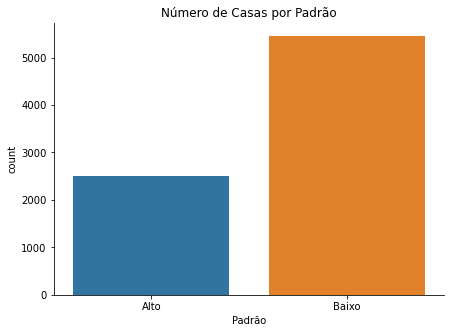

In [49]:
fig, ax = plt.subplots(figsize=(7,5))

ax.set_title('Número de Casas por Padrão')
sns.countplot(data['Padrão'])

for axis in ['top', 'right']:
    ax.spines[axis].set_color(None)

<AxesSubplot:title={'center':'Distribuição por número de Quartos'}, xlabel='Quartos', ylabel='count'>

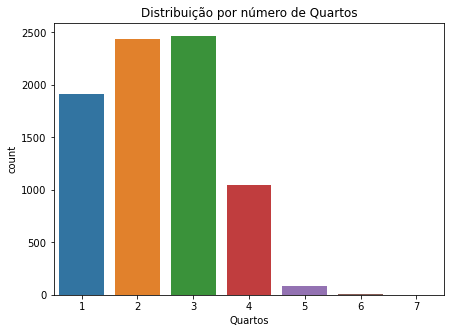

In [50]:
fig, ax = plt.subplots(figsize=(7,5))

ax.set_title('Distribuição por número de Quartos')
sns.countplot(data['Quartos'])

<AxesSubplot:xlabel='Animais', ylabel='count'>

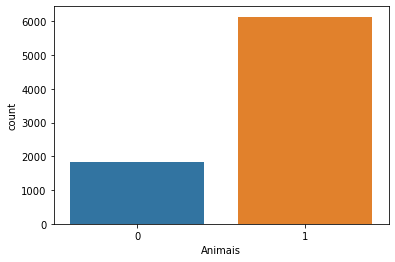

In [51]:
sns.countplot(data['Animais'])

<AxesSubplot:>

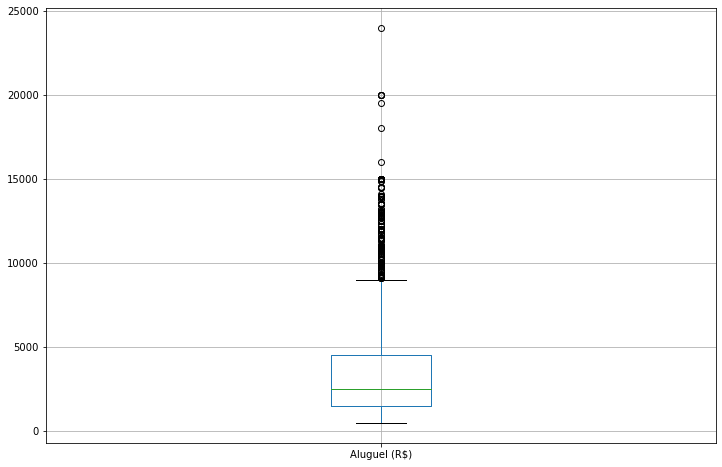

In [52]:
data.boxplot(column=['Aluguel (R$)'],figsize=(12,8))

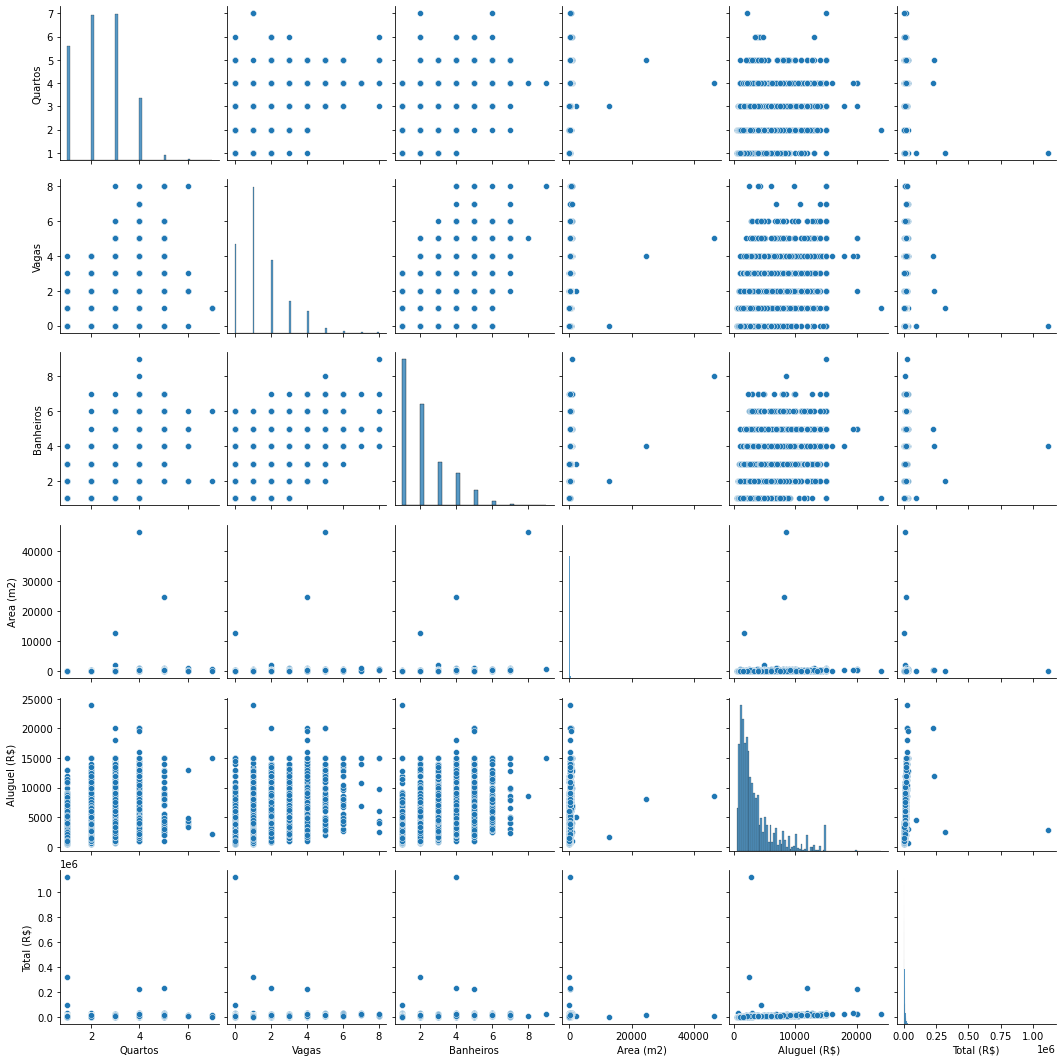

In [53]:
# Distribuição de frequência para cada variável
sns.pairplot(data[['Quartos', 'Vagas', 'Banheiros', 'Area (m2)', 'Andares', 'Aluguel (R$)', 'Total (R$)']])

<AxesSubplot:>

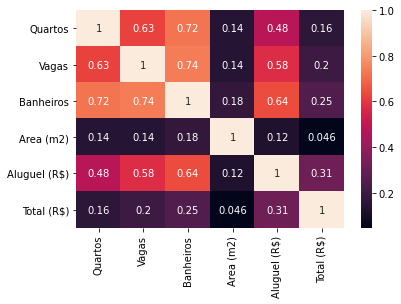

In [54]:
# Mapa de calor das principais variáveis numéricas
sns.heatmap(data[['Quartos', 'Vagas', 'Banheiros', 'Area (m2)', 'Andares', 'Aluguel (R$)', 'Total (R$)']].corr(), annot=True)

## Predictive Model

Criar uma classificação para as casas como baixo e alto padrão

In [55]:
data['Padrão'] = data['Padrão'].apply(lambda x: 1 if x=='Alto' else 0)

In [56]:
X = data.iloc[:,1:-1]
y = data['Padrão']

In [57]:
print(X.shape)
print(y.shape)

(7963, 12)
(7963,)


In [58]:
# Balanceamento dos dados a partir da classe minoritária (alto padrão)
ROS = RandomOverSampler()

X,y = ROS.fit_resample(X,y)

In [59]:
print(X.shape)
print(y.shape)

(10912, 12)
(10912,)


In [60]:
# Dimensionamento dos dados
MMS = MinMaxScaler()
MMS.fit(X)

X = MMS.transform(X)

In [61]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.001274,0.166667,0.000,0.125,0.020000,1.0,1.0,0.001849,0.120646,0.000673,0.129139,0.004565
1,0.006670,0.500000,0.375,0.000,0.063333,1.0,0.0,0.001074,0.191164,0.005579,0.198675,0.006669
2,0.001490,0.000000,0.000,0.125,0.016667,1.0,0.0,0.000895,0.099405,0.000000,0.125828,0.002978
3,0.000863,0.166667,0.000,0.000,0.003333,1.0,0.0,0.000242,0.027698,0.000070,0.046358,0.000816
4,0.000302,0.000000,0.000,0.000,0.000000,0.0,0.0,0.000000,0.014444,0.000080,0.026490,0.000294
...,...,...,...,...,...,...,...,...,...,...,...,...
10907,0.007534,0.333333,0.500,0.750,0.053333,1.0,0.0,0.006761,0.107901,0.015397,0.119205,0.013321
10908,0.002569,0.166667,0.375,0.375,0.003333,1.0,0.0,0.001611,0.235344,0.002126,0.245033,0.007179
10909,0.004728,0.500000,0.375,0.375,0.013333,0.0,0.0,0.002295,0.086661,0.002977,0.096026,0.004933
10910,0.001705,0.333333,0.375,0.250,0.026667,1.0,1.0,0.001074,0.214104,0.000848,0.221854,0.005832


In [62]:
# Divisão dos dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=20)

### Modelo01 - Regressão Logística

In [63]:
LR_model = LogisticRegression()

In [64]:
LR_model.fit(X_treino, y_treino)

LogisticRegression()

In [65]:
print(LR_model.score(X_teste, y_teste))

0.9477782867613376


In [66]:
y_pred = LR_model.predict(X_teste)

In [67]:
print('Acurácia do modelo:', accuracy_score(y_teste, y_pred))

Acurácia do modelo: 0.9477782867613376


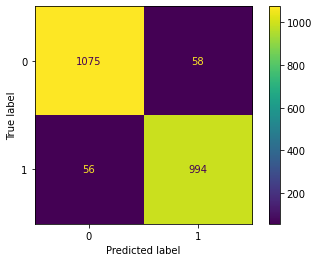

In [68]:
plot_confusion_matrix(LR_model, X_teste, y_teste)

In [69]:
print(classification_report(y_teste,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1133
           1       0.94      0.95      0.95      1050

    accuracy                           0.95      2183
   macro avg       0.95      0.95      0.95      2183
weighted avg       0.95      0.95      0.95      2183



### Modelo 02 - K-Nearest Neighbors

In [70]:
KNN_model = KNeighborsClassifier(n_neighbors=5)

In [71]:
KNN_model.fit(X_treino, y_treino)

KNeighborsClassifier()

In [72]:
y_pred =  KNN_model.predict(X_teste)

In [73]:
print('Acurácia do modelo:', accuracy_score(y_teste, y_pred))

Acurácia do modelo: 0.9468621163536418


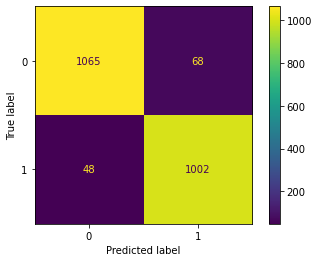

In [74]:
plot_confusion_matrix(KNN_model, X_teste, y_teste)

In [75]:
print(classification_report(y_teste,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1133
           1       0.94      0.95      0.95      1050

    accuracy                           0.95      2183
   macro avg       0.95      0.95      0.95      2183
weighted avg       0.95      0.95      0.95      2183

